In [1]:
using ISPC

/usr/bin/libtool


In [2]:
@fastmath @inline function mandel(c_re, c_im, count)
    z_re = c_re
    z_im = c_im
    i = 1
    while i <= count
#    for i in 0:count-1
        if (z_re * z_re + z_im * z_im > 4.0f0)
            break
        end
        new_re = z_re*z_re - z_im*z_im
        new_im = 2.0f0 * z_re * z_im
        z_re = c_re + new_re
        z_im = c_im + new_im
        i += 1
    end
    return i
end

mandel (generic function with 1 method)

In [3]:
@ispc function mandelbrot_ispc(x0, y0, x1, y1, output, max_iters)
    height, width = size(output)
    dx = (x1 - x0) / width
    dy = (y1 - y0) / height
    for i in 0:width-1
        @foreach(0:height-1) do j
            x = x0 + i * dx
            y = y0 + j * dy
            output[j, i] = mandel(x, y, max_iters)
        end
    end
    output
end

mandelbrot_ispc (generic function with 1 method)

In [4]:
output = zeros(Float32, 768, 1024);

In [6]:
@time out = mandelbrot_ispc(-2.0f0, -1.0f0, 1.0f0, 1.0f0, output, 256);

  0.118687 seconds (5 allocations: 240 bytes)


In [7]:
using PyPlot

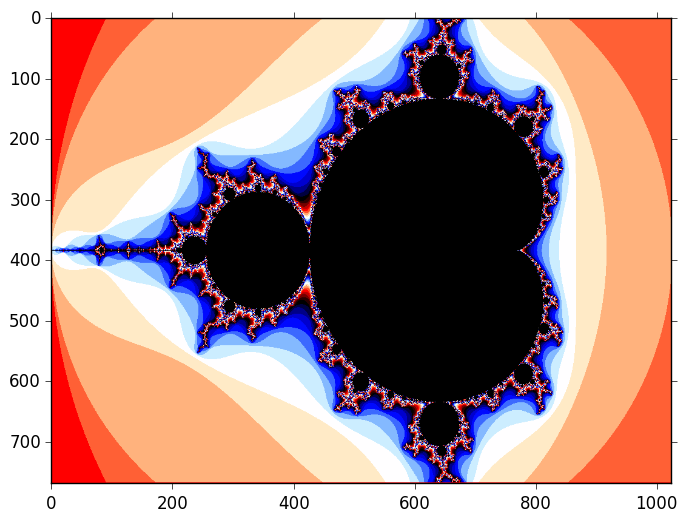

In [8]:
imshow(out, cmap="flag", aspect="equal")
display(gcf())
close()